In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#as the team name was changed making changes in the data for accurate anaylysis
deliveries = deliveries.replace('Delhi Daredevils', 'Delhi Capitals')




In [5]:
deliveries.shape

(179078, 21)

In [6]:
matches = pd.read_csv('matches.csv')

#as hyderabad old team was named as Deccan chargers lets do the needful change
matches = matches.replace({'Delhi Daredevils': 'Delhi Capitals'})

In [7]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

# Q1. Who will win the match? (DC / RR)

In [8]:
#checking total matches played by DC
matches_dc = matches[(matches['team1']=='Delhi Capitals')|(matches['team2']=='Delhi Capitals')]

wins_dc = np.sum(matches_dc.winner == 'Delhi Capitals')

print("Total matches played by dc:", matches_dc.shape[0])
print("Total matches won by dc:", wins_dc)
print("dc winning percentage:", (wins_dc/matches_dc.shape[0]*100))

Total matches played by dc: 177
Total matches won by dc: 77
dc winning percentage: 43.50282485875706


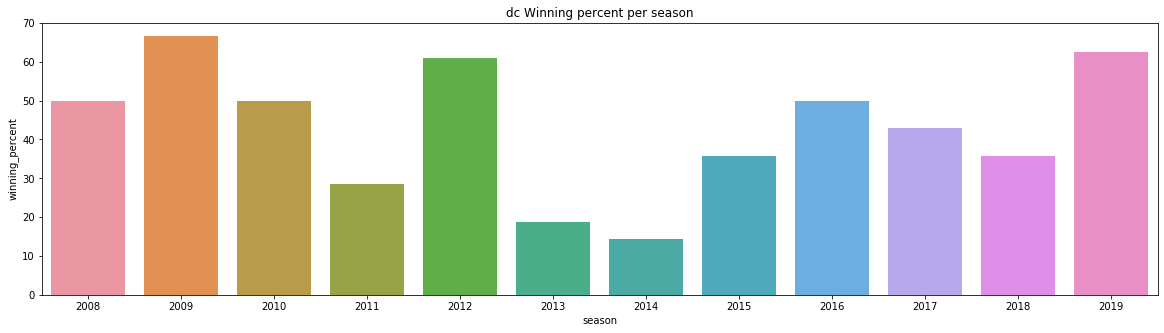

In [9]:
#checking RCB matches winning percentage per season

dc_wins = matches_dc[matches_dc.winner == 'Delhi Capitals']
# matches['season'].unique()
dc_season_wins = dc_wins.groupby('season')['winner'].count().reset_index()
dc_season_wins['total_matches_dc']=matches_dc.groupby('season')['id'].count().values
dc_season_wins['winning_percent']= (dc_season_wins.winner/dc_season_wins.total_matches_dc)*100

plt.figure(figsize=(20,5))
sns.barplot(x=dc_season_wins['season'], y = dc_season_wins['winning_percent'])
plt.title("dc Winning percent per season")
plt.show()

In [10]:
#checking total matches played by KKR
matches_rr = matches[(matches['team1']=='Rajasthan Royals')|(matches['team2']=='Rajasthan Royals')]

wins_rr = np.sum(matches_rr.winner == 'Rajasthan Royals')

print("Total matches played by rr:", matches_rr.shape[0])
print("Total matches won by rr:", wins_rr)
print("rr winning percentage:", (wins_rr/matches_rr.shape[0]*100))

Total matches played by rr: 147
Total matches won by rr: 75
rr winning percentage: 51.02040816326531


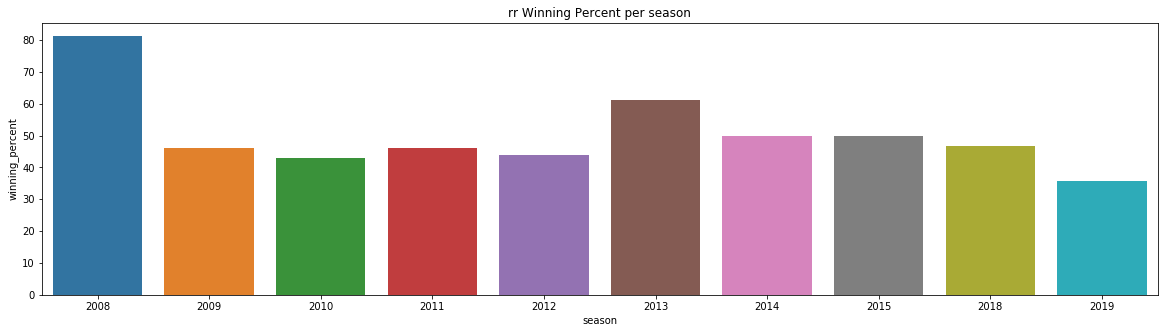

In [11]:
#checking Delhi Capitals matches winning percentage per season

rr_wins = matches_rr[matches_rr.winner == 'Rajasthan Royals']
# matches['season'].unique()
rr_season_wins = rr_wins.groupby('season')['winner'].count().reset_index()
rr_season_wins['total_matches_rr']=matches_rr.groupby('season')['id'].count().values
rr_season_wins['winning_percent']= (rr_season_wins.winner/rr_season_wins.total_matches_rr)*100

plt.figure(figsize=(20,5))
sns.barplot(x=rr_season_wins['season'], y = rr_season_wins['winning_percent'])
plt.title('rr Winning Percent per season')
plt.show()

In [13]:
#checking matches between 'DC' and 'RR'
matches_dc_rr = matches[((matches['team1']=='Delhi Capitals')&(matches['team2']=='Rajasthan Royals'))|((matches['team2']=='Delhi Capitals')&(matches['team1']=='Rajasthan Royals'))]
matches_dc_rr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
92,93,2008,Jaipur,2008-05-11,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Delhi Capitals,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN


season  winner          
2008    Rajasthan Royals     66.666667
        Delhi Capitals       33.333333
2009    Delhi Capitals       50.000000
        Rajasthan Royals     50.000000
2010    Delhi Capitals      100.000000
2011    Rajasthan Royals    100.000000
2012    Delhi Capitals      100.000000
2013    Rajasthan Royals    100.000000
2014    Rajasthan Royals    100.000000
2015    Rajasthan Royals    100.000000
2018    Delhi Capitals       50.000000
        Rajasthan Royals     50.000000
2019    Delhi Capitals      100.000000
Name: winner, dtype: float64

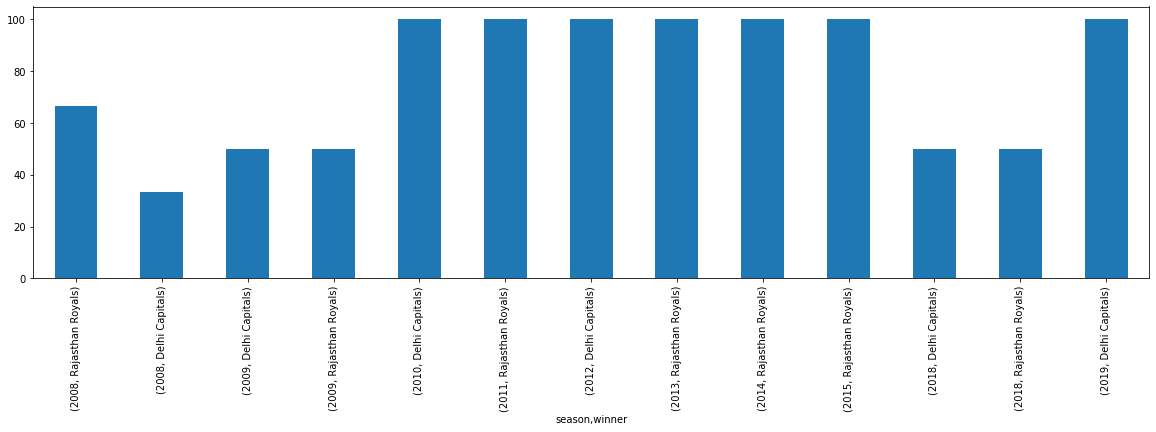

In [14]:
#Now lets see how DC has performed over RR


res = matches_dc_rr.groupby('season')['winner'].value_counts(normalize=True)*100
display(res)

plt.figure(figsize=(20,5))
res.plot(kind='bar')
plt.show()

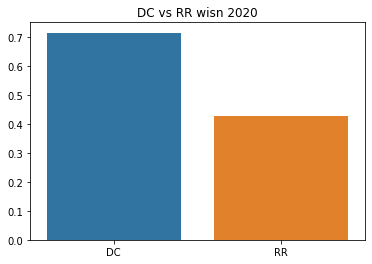

In [15]:
#2020 
win_2020_dc = 5/7
win_2020_rr = 3/7

win_2020_dc, win_2020_rr
plt.title("DC vs RR wisn 2020")
sns.barplot(['DC', 'RR'], [win_2020_dc, win_2020_rr])

**Inference:**
    From the graphs above we can clearly see that Delhi Capitals has a higher winning percentage than RR mostly in all seasons but DC is a bit insconsistent about their performance. whereas RR has maintained average winnings accross seasons. DC has been doing well in 2020 season as well. so we can say DC might win the match. Though RR will give a tough competition as it needs to reclaim its position.

# Q2. How many runs will Delhi score in powerplay?



In [62]:
#getting all matches played between DC and RR
dc_bats = deliveries[((deliveries.batting_team=='Delhi Capitals')&(deliveries.bowling_team=='Rajasthan Royals'))]

#getting powerplay scores only (overs 1- 6)
dc_bats_pp = dc_bats[dc_bats.over.isin(np.arange(1,7))]

#counting total runs scored in powerplay by delhi matchwise
dc_runs_pp = dc_bats_pp.groupby('match_id')['total_runs'].sum()



,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14457,62,2,Delhi Capitals,Rajasthan Royals,1,1,G Gambhir,V Sehwag,MM Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
14458,62,2,Delhi Capitals,Rajasthan Royals,1,2,G Gambhir,V Sehwag,MM Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
14459,62,2,Delhi Capitals,Rajasthan Royals,1,3,G Gambhir,V Sehwag,MM Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
14460,62,2,Delhi Capitals,Rajasthan Royals,1,4,G Gambhir,V Sehwag,MM Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
14461,62,2,Delhi Capitals,Rajasthan Royals,1,5,G Gambhir,V Sehwag,MM Patel,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
14462,62,2,Delhi Capitals,Rajasthan Royals,1,6,G Gambhir,V Sehwag,MM Patel,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
14463,62,2,Delhi Capitals,Rajasthan Royals,2,1,V Sehwag,G Gambhir,SR Watson,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
14464,62,2,Delhi Capitals,Rajasthan Royals,2,2,V Sehwag,G Gambhir,SR Watson,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
14465,62,2,Delhi Capitals,Rajasthan Royals,2,3,V Sehwag,G Gambhir,SR Watson,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
14466,62,2,Delhi Capitals,Rajasthan Royals,2,4,V Sehwag,G Gambhir,SR Watson,0,0,0,0,0,0,0,0,0,V Sehwag,bowled,NaN


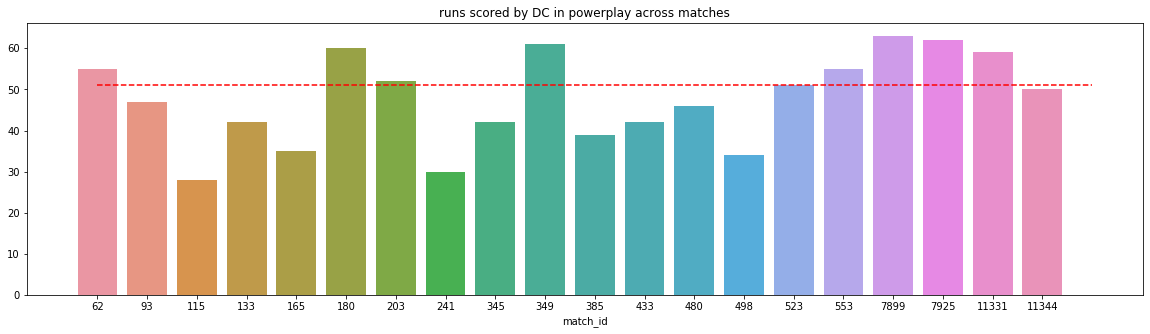

In [79]:
plt.figure(figsize=(20,5))
sns.barplot(dc_runs_pp.index,dc_runs_pp.values)
# sns.boxplot(dc_bats_pp.match_id, dc_bats_pp.total_runs.sum())
plt.hlines(xmin=0,xmax=20, y=51, linestyle='--', color='r')

plt.title("runs scored by DC in powerplay across matches")

plt.show()

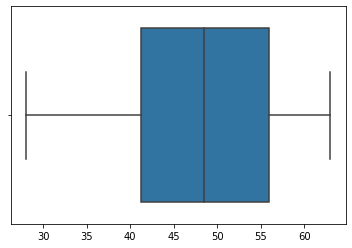

In [80]:
sns.boxplot(dc_runs_pp.values)

**Inference: **
    from the graoh above we can see delhi when agains RR has mostly scored more than 50 in the previous few matches in previous season . if we see season 2020 in last RR vs DC match int 5.5 overs delhi had scored 50/3 so we can safely say they may score 51 or more.

# Q3. How many runs will Steve Smith  score in the match?

In [16]:
lst =  deliveries.batsman.sort_values().unique()

lst

array(['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary',
       'A Dananjaya', 'A Flintoff', 'A Hales', 'A Joseph', 'A Kumble',
       'A Mishra', 'A Mithun', 'A Mukund', 'A Nehra', 'A Singh',
       'A Symonds', 'A Turner', 'A Uniyal', 'A Zampa', 'AA Bilakhia',
       'AA Chavan', 'AA Jhunjhunwala', 'AA Noffke', 'AB Agarkar',
       'AB Barath', 'AB Dinda', 'AB McDonald', 'AB de Villiers',
       'AC Blizzard', 'AC Gilchrist', 'AC Thomas', 'AC Voges',
       'AD Mascarenhas', 'AD Mathews', 'AD Nath', 'AD Russell',
       'AF Milne', 'AG Murtaza', 'AG Paunikar', 'AJ Finch', 'AJ Tye',
       'AL Menaria', 'AM Nayar', 'AM Rahane', 'AN Ahmed', 'AN Ghosh',
       'AP Dole', 'AP Majumdar', 'AP Tare', 'AR Bawne', 'AR Patel',
       'AS Rajpoot', 'AS Raut', 'AS Yadav', 'AT Rayudu', 'AUK Pathan',
       'Abdur Razzak', 'Anirudh Singh', 'Ankit Sharma', 'Ankit Soni',
       'Anureet Singh', 'Avesh Khan', 'Azhar Mahmood', 'B Akhil',
       'B Chipli', 'B Kumar', 'B Laughlin', 'B Lee', 'B

In [17]:
#Steve Smith is named as SPD Smith
np.sum(deliveries.batsman.sort_values().unique() == 'SPD Smith')

1

In [18]:
deliveries[deliveries['batsman']=='SPD Smith'].groupby('match_id')['batsman_runs'].sum()

match_id
2         84
4         26
13        43
17        27
25        27
28        17
29        51
33        45
38         4
40         9
43        34
51        38
54        15
56         1
59        51
310       39
315       25
321       13
324       44
329       16
332       23
335       34
341       26
348       47
351        2
353       14
358       18
362       24
365       37
399       39
        ... 
494        9
520       33
523       10
526       79
529       13
533        6
536        5
540       31
549       23
558       68
563        4
570       14
574       12
582        5
586       38
592        4
596       31
598       46
601      101
605       45
11140     24
11148     31
11150     39
11312     79
11316     15
11318     12
11327     59
11331     51
11334      2
11336     22
Name: batsman_runs, Length: 72, dtype: int64

In [20]:
ss_runs = deliveries[deliveries['batsman']=='SPD Smith'].groupby('match_id')['batsman_runs'].sum().values

print(f'Average runs scored by SPD Smith: {np.mean(ss_runs)}')
print(f'Median runs scored by  SPD Smith: {np.median(ss_runs)}')
print(f'Minimum runs scored by  SPD Smith: {np.min(ss_runs)}')
print(f'Maximum runs scored by  SPD Smith: {np.max(ss_runs)}')



Average runs scored by SPD Smith: 28.430555555555557
Median runs scored by  SPD Smith: 24.5
Minimum runs scored by  SPD Smith: 1
Maximum runs scored by  SPD Smith: 101


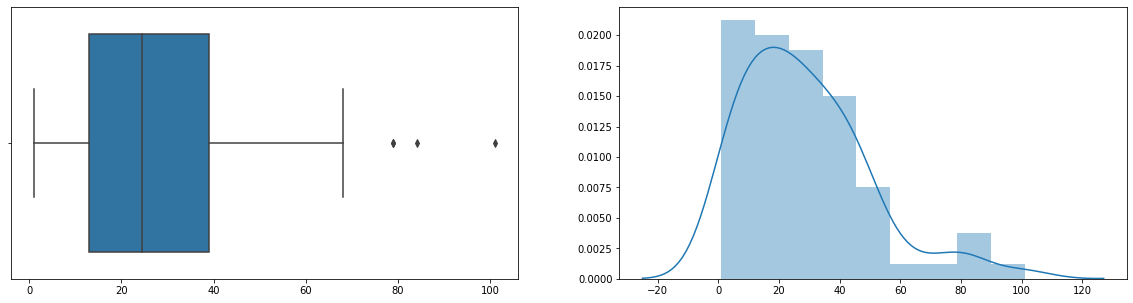

In [21]:
# #checking visually

fig, ax = plt.subplots(1,2, figsize=(20,5))


sns.boxplot(ss_runs, ax=ax[0]);
sns.distplot(ss_runs, ax=ax[1])

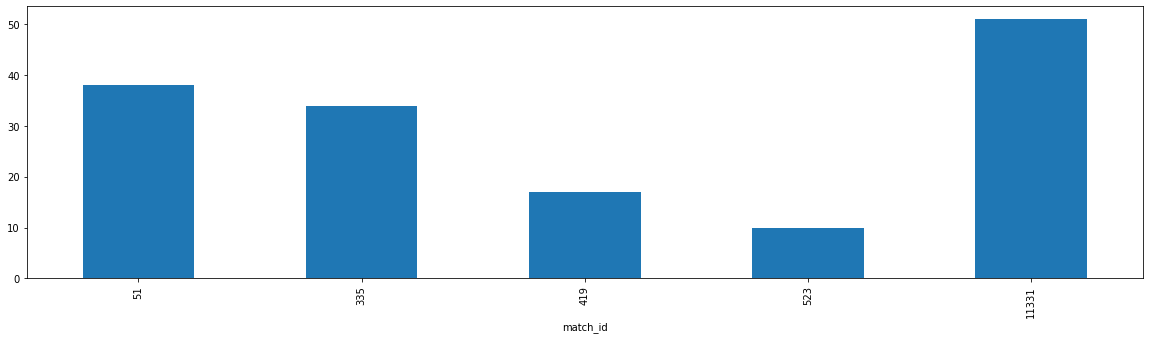

In [22]:
#checking how many runs Steve smith scored each match between DC and RR

ss_bats = deliveries[deliveries['batsman']=='SPD Smith']

#getting matches between RCB and KKR
ss_vs_dc = ss_bats[ss_bats.bowling_team =='Delhi Capitals'].groupby('match_id')['batsman_runs'].sum()
ss_vs_dc.plot(kind='bar', figsize=(20,5))

In [23]:
ss_vs_dc.values.mean()
np.median(ss_vs_dc.values)

34.0

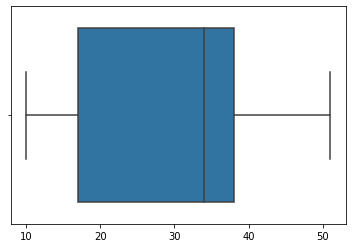

In [24]:
sns.boxplot(ss_vs_dc.values)

**Inference:**
    We can see that SS Smith has a decent performance on an average agaianst DC he has scores around 18-38's on average however mostly scores somewhere between 30's and his max is 50. however in 2020 his average is around 23.14 , so it will be safe to go with (16-30) option

# Q4. How many wides will be bowled in the match?

In [25]:
deliveries['wide_runs'].value_counts()

0    173673
1      4915
2       230
5       208
3        47
4         5
Name: wide_runs, dtype: int64

In [26]:
wide_bowls = deliveries[deliveries.wide_runs!=0]

#counting wide bowls during a match
wide_bowls.groupby('match_id')['ball'].count().head()

match_id
1     8
2     8
3     9
4    13
5     8
Name: ball, dtype: int64

In [27]:
#checking wide bowls only when DC is playing
wb_dc = wide_bowls[(wide_bowls.batting_team=='Delhi Capitals')|(wide_bowls.bowling_team=='Delhi Capitals')]

wb_dc.groupby('match_id')['ball'].count().head()

match_id
5     8
9     9
15    5
18    6
21    3
Name: ball, dtype: int64

In [28]:
wb_dc_count = wb_dc.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Delhi Capitals in a match: {np.mean(wb_dc_count)}')
print(f'Median  wide bowls by Delhi Capitals in a match: {np.median(wb_dc_count)}')
print(f'Minimum  wide bowls by Delhi Capitals in a match: {np.min(wb_dc_count)}')
print(f'Maximum  wide bowls by Delhi Capitals in a match: {np.max(wb_dc_count)}')

Average wide bowls by Delhi Capitals in a match: 6.8977272727272725
Median  wide bowls by Delhi Capitals in a match: 7.0
Minimum  wide bowls by Delhi Capitals in a match: 1
Maximum  wide bowls by Delhi Capitals in a match: 15


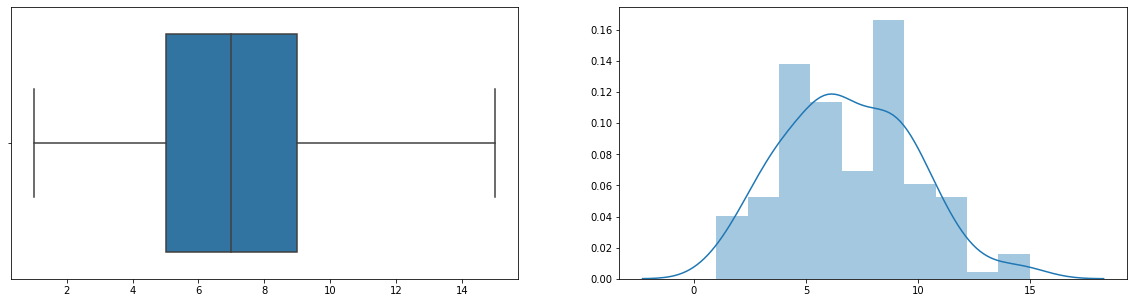

In [29]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_dc_count, ax = ax[0])
sns.distplot(wb_dc_count, ax=ax[1])

In [31]:
#checking wide bowls only when RR is playing
wb_rr = wide_bowls[(wide_bowls.batting_team=='Rajasthan Royals')|(wide_bowls.bowling_team=='Rajasthan Royals')]

wb_rr.groupby('match_id')['ball'].count().head()

match_id
62     8
65     8
68     7
70     5
78    10
Name: ball, dtype: int64

In [32]:
wb_rr_count = wb_rr.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Rajasthan Royals in a match: {np.mean(wb_rr_count)}')
print(f'Median  wide bowls by Rajasthan Royals in a match: {np.median(wb_rr_count)}')
print(f'Minimum  wide bowls by Rajasthan Royals in a match: {np.min(wb_rr_count)}')
print(f'Maximum  wide bowls by Rajasthan Royals in a match: {np.max(wb_rr_count)}')

Average wide bowls by Rajasthan Royals in a match: 7.227586206896552
Median  wide bowls by Rajasthan Royals in a match: 7.0
Minimum  wide bowls by Rajasthan Royals in a match: 1
Maximum  wide bowls by Rajasthan Royals in a match: 19


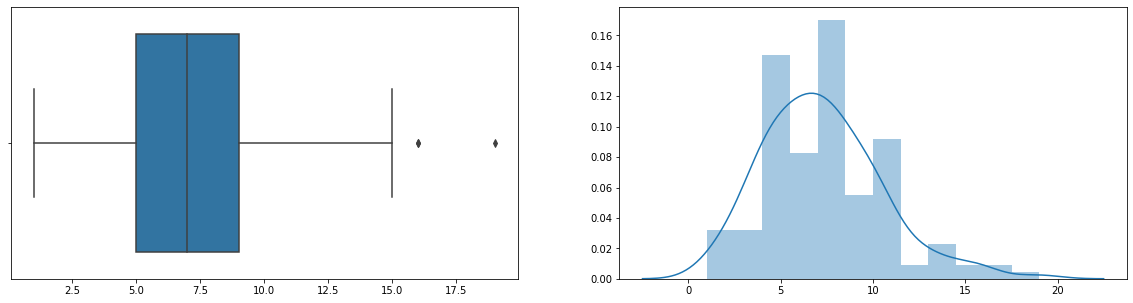

In [33]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_rr_count, ax = ax[0])
sns.distplot(wb_rr_count, ax=ax[1])


In [35]:
#lets also check the matches played between dc and rr
wb_dc_rr = wide_bowls[((wide_bowls.batting_team=='Delhi Capitals')&(wide_bowls.bowling_team=='Rajasthan Royals'))|((wide_bowls.batting_team=='Rajasthan Royals')&(wide_bowls.bowling_team=='Delhi Capitals'))]

wb_dc_rr.groupby('match_id')['ball'].count()

match_id
62        8
93        8
115       6
133       6
165       6
180       9
203       6
241       4
345       7
349       4
385       8
433      10
480       4
498      10
523      12
553      15
7899      3
7925      9
11331     4
11344     7
Name: ball, dtype: int64

In [37]:
wb_DCRR = wb_dc_rr.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (DC and RR) match: {np.mean(wb_DCRR)}')
print(f'Median  wide bowls in (DC and RR) match: {np.median(wb_DCRR)}')
print(f'DCnimum  wide bowls in (DC and RR) match: {np.min(wb_DCRR)}')
print(f'Maximum  wide bowls in (DC and RR) match: {np.max(wb_DCRR)}')

Average wide bowls in (DC and RR) match: 7.3
Median  wide bowls in (DC and RR) match: 7.0
DCnimum  wide bowls in (DC and RR) match: 3
Maximum  wide bowls in (DC and RR) match: 15


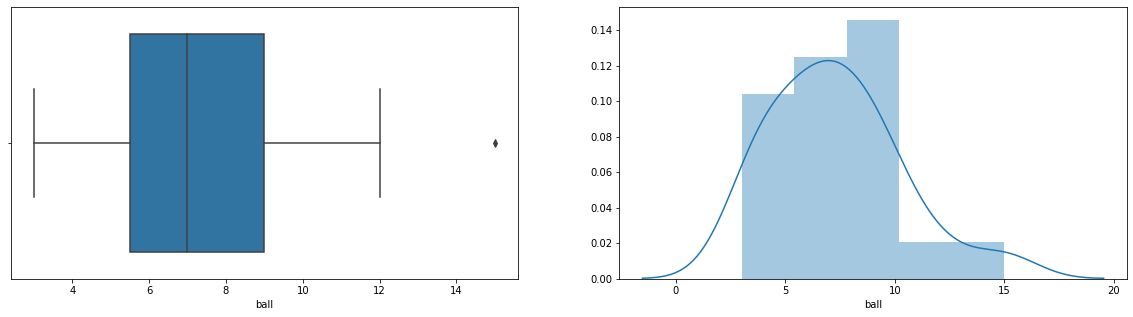

In [38]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_DCRR, ax = ax[0])
sns.distplot(wb_DCRR, ax=ax[1])

**Inference:**
    So from all the plots and graphs above we have understood 
        - DC on an average has around 6 wide bowls in a match
        - RR on an average has around 7 wide bowls in a match
        - we also checked DC - RR match, an average we can say they might have 6-8 wide bowls . So we can clearly go with option D (6 or more)

# Q5. How many wickets will be taken in total during the match?

In [41]:
#getting all matches played between DC and RR
tot_dc_rr = deliveries[((deliveries.batting_team=='Delhi Capitals')&(deliveries.bowling_team=='Rajasthan Royals'))|((deliveries.batting_team=='Rajasthan Royals')&(deliveries.bowling_team=='Delhi Capitals'))]

#getting only rows where wickets where taken
totw_dc_rr = tot_dc_rr[tot_dc_rr.player_dismissed.notnull()]

#counting total wickets per match
totw_dc_rr.groupby('match_id')['player_dismissed'].count()

match_id
62        9
93       14
115      19
133      12
165      12
180      10
203      16
241      10
345       9
349      10
385      13
433       5
480       8
498      15
523      10
553       9
7899      9
7925     11
11331    10
11344    14
Name: player_dismissed, dtype: int64

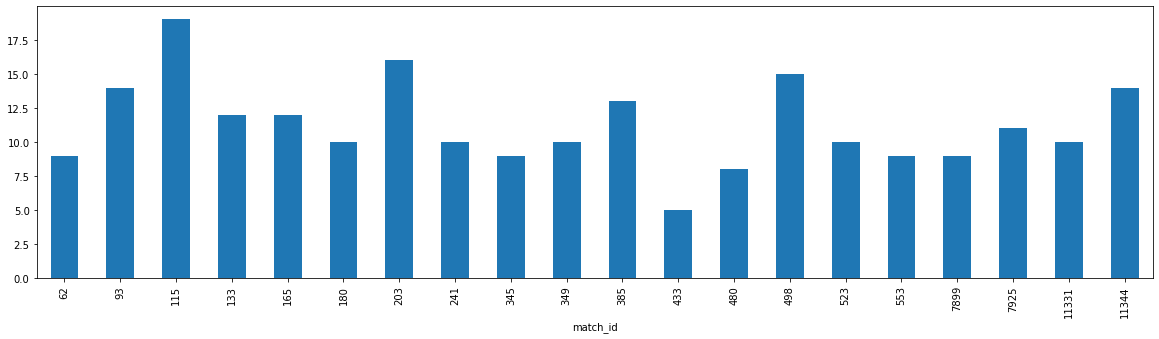

In [44]:
#counting total wickets per match
totw_dc_rr.groupby('match_id')['player_dismissed'].count().plot(kind='bar', figsize=(20,5));

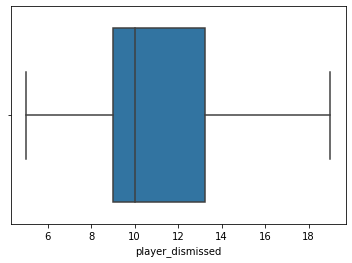

In [46]:
totw_dcrr = totw_dc_rr.groupby('match_id')['player_dismissed'].count()
sns.boxplot(totw_dcrr)

**Inference:**
    - As per the matches overall we can say that total wickets taken by both teams included (DC and RR) are on an average 10 however its going to be tough match as both teams will want to reclaim their postitions so we can say wickets in total may go more than average i.e (11-15)
    